# CENG 384 - Programming Assignment

In this homework, you will display and analyze sound signals in the time domain and in the frequency domain. The tasks and explanations are provided in the form of a Jupyter Notebook file, which you can download from <a href="https://colab.research.google.com/drive/19TGCQ1FdgSVQNX1PFnKhoS3uxSoJ_UnB">here</a>. To see it with the drawings, you should run it in the directory you can download from the COW page of the course.

### Sound samples and the Python file

The sound samples that you can use in this assignment and a Python starter file are provided to you at the COW page of the course.

### Submission instructions

Run file `collect_submission.sh`, which will create you a `ceng384_pHW.zip` file. Upload this file at the COW page of the course.
  
### Deadline

17th of May, 23:55
  
### Testing Environment

Your solutions will be tested on inek machines (running Ubuntu 18.04) with  Python v2.7. For the libraries, minimum requirements are: Numpy v1.11 , Matplotlib v1.5.1, Scipy 0.17.

In [11]:
# Some setup utils
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Warm-up: Generating, Plotting and Analyzing a Simple Signal

Let us start warming up by generating a simple signal with the numpy library (check <a href="https://docs.scipy.org/doc/numpy/user/quickstart.html">this</a> for a tutorial). Numpy is a very talented library for working with numerical data structures, like complex numbers, vectors, matrices etc.

In the following cell, we will first construct a simple continuous-time signal:
$$x(t) = \cos(2\pi t) + \sin(40\pi t).$$

For plotting the signal, we will use the matplotlib library (check <a href="https://matplotlib.org/users/pyplot_tutorial.html">this</a> for a tutorial).

Text(0.5,1,'$x(t) = \\cos(2\\pi t) + \\sin(40\\pi t)$')

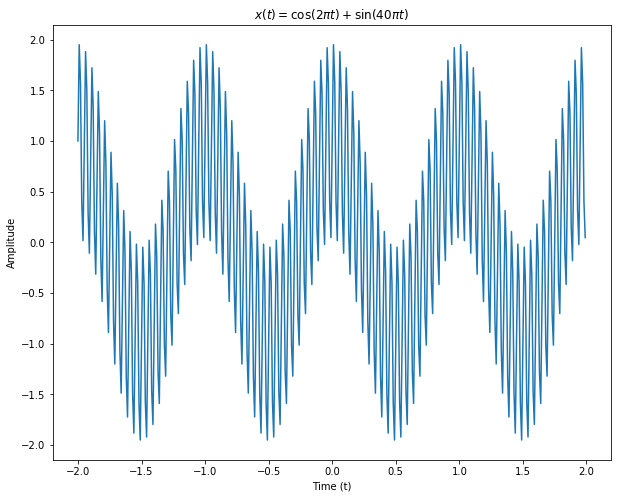

In [12]:
t = np.arange(-2, 2, .01) # Sample a time interval between -2 and 2
x = np.cos(2*np.pi*t)+np.sin(40*np.pi*t)

plt.plot(t, x)
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('$x(t) = \cos(2\pi t) + \sin(40\pi t)$')

See, that's very easy. You can just construct any signal in this manner and plot it.

In the previous step, we actually constructed a discrete-time signal and drew that as if it were a continuous-time signal. Now, let us directly work with a discrete-time signal.

In the following cell, we will construct and plot a simple discrete-time signal:
$$x[n] = \cos[0.1 \pi n].$$

(-1.2, 1.2)

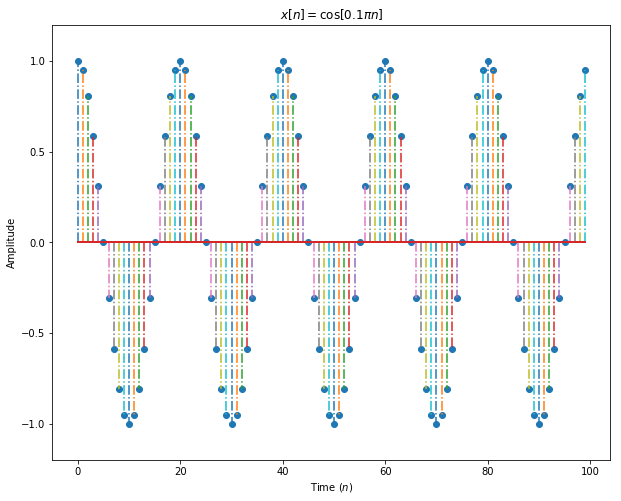

In [13]:
n = np.array(range(0, 100)) 
# np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(n, np.cos(0.1 * np.pi * n), '-.')
plt.setp(baseline,'linewidth', 2)
plt.xlabel('Time ($n$)')
plt.ylabel('Amplitude')
plt.title('$x[n]=\cos[0.1 \pi n]$')
plt.ylim(-1.2, 1.2)

Nice! So colorful and periodic :)

# Serious Stuff: Load and Plot a WAV file

A standard format for storing audio/sound signals is the Waveform Audio Format (WAV in short -- see <a href="https://en.wikipedia.org/wiki/WAV">here</a> for more info). Don't worry, we will not ask you to load a WAV file from scratch. In the following step, we provide you a routine for loading and plotting a WAV file. 

Under `"./sound_samples"` directory, there are many other sound samples. Load them and check how they look.

Sound() is finishing with:
	 source file:  sound_samples/cat.wav
	 sampling rate (Hz):  44100
	 duration (s):  5.06777777778
	 number of samples:  223489


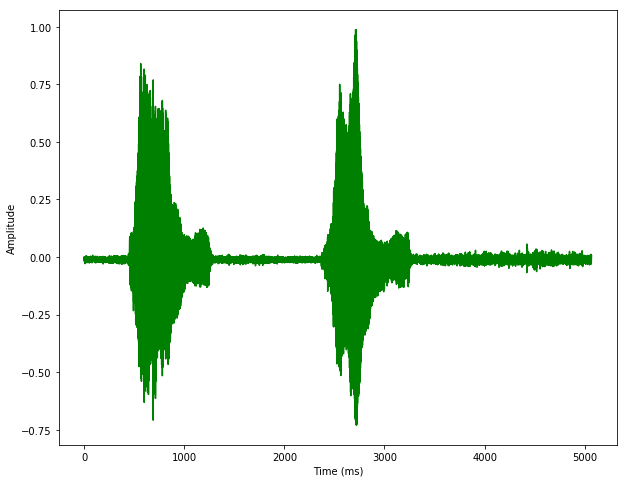

In [14]:
from ceng384_prog_hw import *

filename = 'sound_samples/cat.wav'

# Create a Sound object
signal = Sound(filename, verbose=True)

# Let us plot our signal
signal.plot_sound()

# The Discrete Fourier Transform

The sound signal that you have just loaded and plotted is a discrete-time, finite-interval signal. We can transform such signals into the frequency domain using Discrete Fourier Transform, defined as follows:

$$
X[k] = \displaystyle\sum_{n = 0}^{N-1}x[n] e^{-jk\frac{2\pi}{N}n}  ,  \quad\quad   k = 0,1,2,...,N-1
$$

where $N$ is the length (the number of samples) of our signal $x$.

# Task 1: Implement Fourier Transform

Open file `"ceng384_prog_hw.py"` and complete the implementation of function "dft". 

In [15]:
signal = Sound(filename)

# Let us test your function with the first 100 values of the sound signal
x = signal.data[0:100] 
dft_naive = dft(x)

### Check your implementation
Using the Fast Fourier Transform (FFT) implementation of the Numpy library, let us check how good your implementation was.

In [16]:
# FFT from Numpy:
tic()
dft_fast = np.fft.fft(x)
toc()
tic()
dft_naive = dft(x) # No need to recalculate, but let's repeat it just for clarity
toc()

# You should see a total difference less than 10^-10
error = 0
for i in range(len(dft_naive)):
    error += np.abs(dft_naive[i]-dft_fast[i])
print "The difference (Euclidean distance) is: ", error
print "Your are good to go!" if error < 10**-10 else "FAILED! Your implementation has too much error. Go back and check for errors"

Elapsed time is 0.000214099884033 seconds.
Elapsed time is 0.00103902816772 seconds.
The difference (Euclidean distance) is:  1.0031985987782936e-13
Your are good to go!


# Spectograms

Since sound signals can be too long, composed of many small-segment units of sounds, analyzing a whole sound signal with a single set of spectrum is not practical. A good spectral tool for sound signals is to use a spectogram. 

A spectogram is essentially a matrix composed of DFT of small intervals of the input. Formally, the spectogram $\mathcal{S}\{x[n]\}$ can be calculated as follows:

$$\mathcal{S}\{x[n]\}[i] = \mathcal{F}\{x[i\times s:i\times s+W]\},$$

where $W$ is the length of the interval for which we are calculating the DFT, and $\mathcal{F}\{x[n]\}$ is the DFT of $x[n]$. This is illustrated in the following drawing.

<img src="spectogram_sekil.png" width="50%">

According to this definition, $\mathcal{S}[0]$ is a vector composed of the DFT of $x[0:W-1]$, and $\mathcal{S}[1]$ is then the DFT of $x[s:s+W-1]$. 

The "jump" amount between window positions, $s$, is called the stride.

# Task 2: Calculate Spectogram

Open file `"ceng384_prog_hw.py"` again and complete the implementation of function "calculate_spectogram". Note that the function takes a DFT calculating function as an argument. When you pass your dft() function as an argument, you will realize that it is very very slow. To speed things up, we will continue with the FFT function from numpy.

In [17]:
window_size = 500
stride = 100
x = signal.data
Fs = signal.sampling_rate 
duration = signal.duration

tic()
S = calculate_spectogram(x, window_size=window_size, stride=stride, dft_function=np.fft.fft)
toc()

# Let's print the shape of spectogram just to make things clear
print "S.shape: ", S.shape

Elapsed time is 0.0794451236725 seconds.
S.shape:  (2230, 500)


## Plotting the Spectograms

Now let us plot the spectogram. For visualization purposes, we will do many tricks:

1) Since the Fourier Transform is complex, we will just look at the magnitude.

2) Since the Discrete Fourier Transform is symmetric, we will just visualize a half.

3) We will use a logarithmic scale (in terms of decibels) for the magnitude, to better see the whole range.

Although these steps make the main frequencies/components more visible, they may also exaggerate the small components which may appear as artifacts.

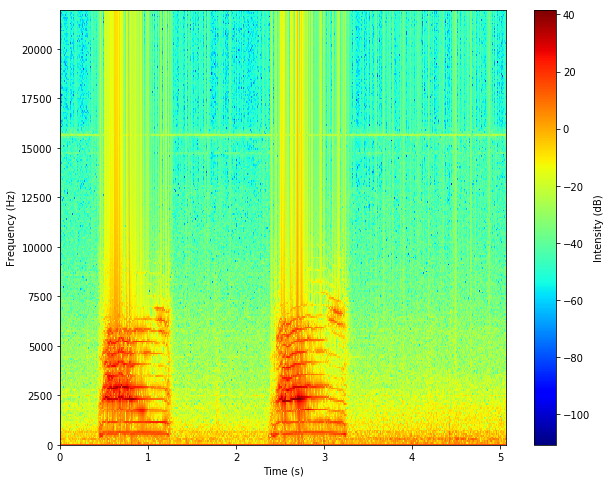

In [18]:
plot_spectogram(S, stride, window_size, duration=duration, Fs=Fs)

# Analyze some signals

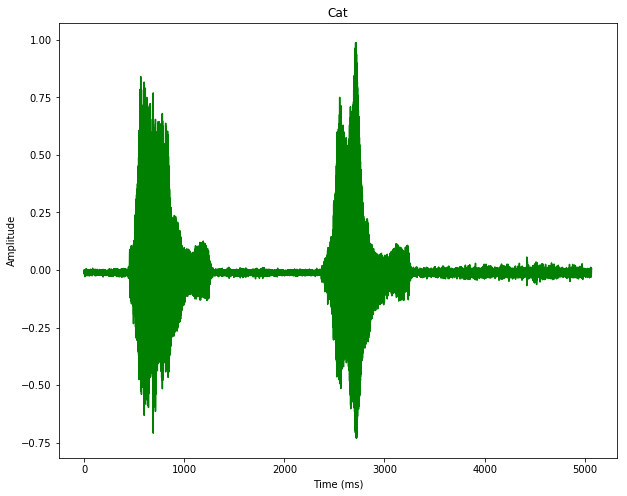

(2230, 500)


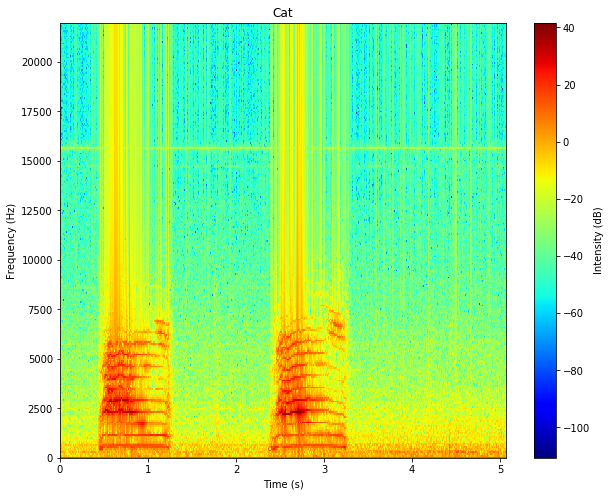

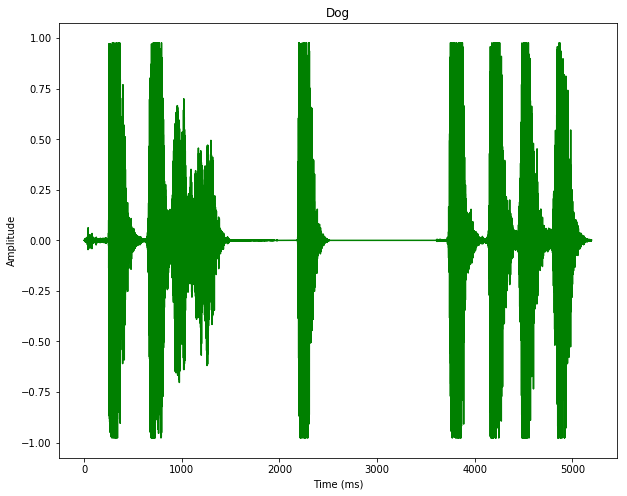

(2287, 500)


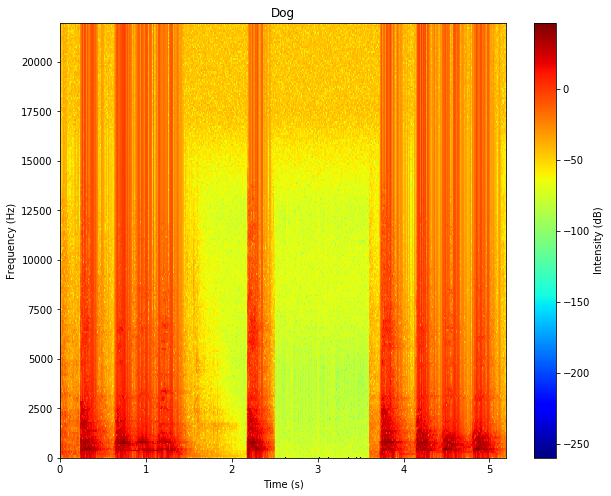

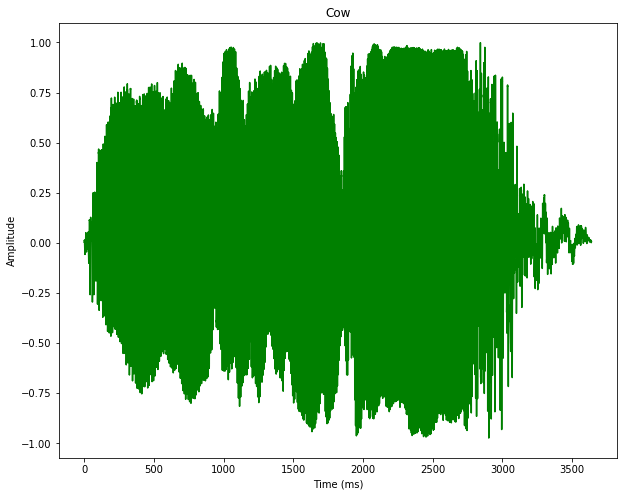

(1160, 500)


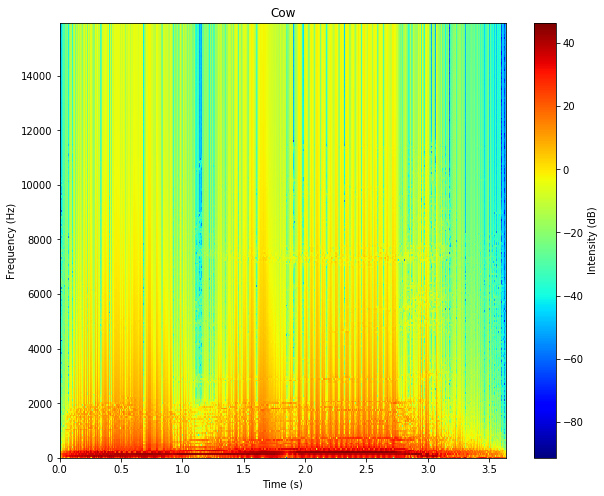

In [23]:
def analyze_sound(filename, name):
    signal = Sound(filename)
    signal.plot_sound(name)
    x = signal.data
    Fs = signal.sampling_rate
    duration = signal.duration
    
    S = calculate_spectogram(x, window_size=window_size, stride=stride, dft_function=np.fft.fft)
    plot_spectogram(S, stride, window_size, duration=duration, Fs=Fs, name=name)

window_size = 500
stride = 100

# Cat sound
cat_sound_filename = 'sound_samples/cat.wav'
analyze_sound(cat_sound_filename, "Cat")

# Dog sound
cow_sound_filename = 'sound_samples/dog.wav'
analyze_sound(cow_sound_filename, "Dog")

# Cow sound
cow_sound_filename = 'sound_samples/cow.wav'
analyze_sound(cow_sound_filename, "Cow")

Let's look at a human sound sample

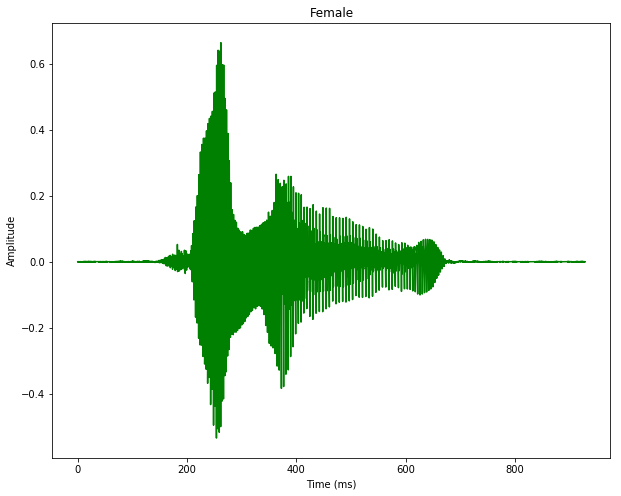

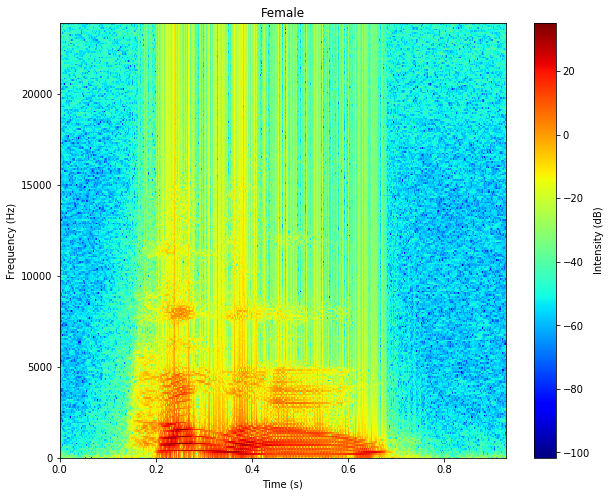

In [20]:
# Female hello sound
female_sound_filename = 'sound_samples/hello_female.wav'
analyze_sound(female_sound_filename, "Female")

# Task 3: Discussion

1) What do you see in the time domain for the sample sounds that you have analyzed above?

### Sample: Airplane
From the time graph, it can be deduced that the airplane started its movement around time 0 ms. The sound of the engines increased as the time increases; hence, probably the airplane took off around the time between 8000 ms and 10000 ms or its movement increased in any other manner. Then, it can be seen that the sound waves diminished through time 14000 ms. Since the graph is dense, there is no discontinuity in the sound.

### Sample: Cat
From the time graph, it can be seen that the cat said meow twice. We can deduce this information from the two similar patterns following each other, i.e., similar local maxima and minima. Each meow took approximately 1000 ms and the cat went silent after 3200 ms.

### Sample: Cow
We mostly see a continuous and dense sound in this graph for a considerably long time duration. We only see one long moo which took approximately 3500 ms. The wave mostly preserves the same amplitude except for the last 500 ms where the signal diminished.

### Sample: Dog
In the first 1500 ms, we see two consecutive sharp barks followed by two relatively low barks. Then, the dog went silent for approximately 1000 ms followed by a sharp bark. In the last 1500 ms, we see four sharp barks. In each bark, we see a similar pattern and similar amplitude values.

### Sample: Duck
From the time domain graph, we observe that the duck quacks twice and the second one is more powerful. The first quack is in between 300 ms and 500 ms and the second one is in between 1000 ms and 1250 ms. 

### Sample: Female
We can clearly observe the differences between vowel and consonants characters. The vowel 'e' appears in the first peak observed between 220-280 ms which has a treble sound since the graph so dense and the second vowel 'o' appears between 360-660 ms which has a deep sound since the graph is sparse in that interval. Consonants appear in the other parts of the signal and they are clearly shaping the wave into a unique voice. The duration of the signal is approximately 500 ms.

### Sample: Photocopy
From this time domain graph, we can see that the sound fluctuates frequently throughout time. This indicates the sound of a photocopy machine is composed of different and diverse frequency values.


2) What do you see in the frequency domain for the sample sounds that you have analyzed above?

### Sample: Airplane
We observe a similar pattern to the time domain graph. In this graph, it is more convenient to focus on the red points since points with other colors are mostly insignificant compared to the red ones. We see that the frequency is concentrated on a limited as well as a low interval, i.e., between 0 Hz and 5000 Hz which implies the sound is deep and continuous.

### Sample: Cat
We observe two similar patterns both of which represents a meow. Each meow is composed of a layered structure similar to each other and these layers mostly concentrate on their corresponding frequency values. From the yellow lines towards the high-frequency values, we conclude that each meow consists of very high-frequency components with very low decibel values. The dominant frequency values are mostly observed between 0 Hz and 7500 Hz.

### Sample: Cow
We observe that the frequency of the signal is mostly condensed into the interval of 0-200 Hz. Again, from the yellow lines towards the high-frequency values, we can simply say that the sound also contains very high-frequency components with very low decibel values. Similar to the time domain graph we also observe that the sound is continuous throughout time.

### Sample: Dog
In this graph, orange points imply decibel values below zero; hence, we see red lines converging orange through high frequencies, i.e., barks do not contain very high-frequency components. Most dominant frequency values are between 0-5000 Hz. We see a similar barking pattern as in the time domain graph; i.e., two sharp barks followed by two low barks and a 1000 ms silent and four sharp barks in the last 1500 ms.

### Sample: Duck
We observe that the second quack is more powerful and the concentration of the frequencies lay in between 2000 - 3000 Hz. This indicates the sound is more treble which makes sense considering the sound belongs to a duck.

### Sample: Female
We clearly see the limited frequency components of a human voice, i.e., the dominant component condensed in between 0-2000 Hz and we also see some relatively less dominant components in between 2000-5000 Hz. The sound diminishes towards high-frequency values as expected. The high-frequency behavior of the sound 'e' is verified as well the low-frequency behavior of the sound 'o' is verified by this graph.

### Sample: Photocopy
From this graph, we can see that the sound is not condensed into a frequency interval. It is spread across the whole frequency range which verifies the sound of a photocopy machine is composed of different and diverse frequency values. 